# 📖 Lab Explanation

# https://arxiv.org/pdf/1706.07581

## Title  
**Assessing Statistical Significance of Model Performance via Permutation Testing: An End-to-End Scikit-learn Experiment**  

---

## 1. Abstract  
This lab evaluates the **statistical significance** of a machine learning model’s performance using the **permutation test score**. By comparing the cross-validated accuracy of a Logistic Regression classifier on the **Iris dataset** to a null distribution obtained through random label permutations, we assess whether the observed performance is due to chance.  

---

## 2. Methodology  

- **Dataset**: Iris dataset ($150$ samples, $4$ features, $3$ classes).  
- **Model**: Logistic Regression with L2 regularization, embedded in a pipeline with standard scaling.  
- **Evaluation**: 5-fold cross-validation.  
- **Permutation Test**: $n = 100$ permutations of class labels used to generate a null distribution of accuracies.  
- **Metric**: Accuracy, with associated $p$-value.  

---

## 3. Results  

- The model’s **cross-validated score** exceeded the distribution of scores obtained from permuted labels.  
- The **p-value $\approx 0$**, indicating that the probability of achieving the observed accuracy under random labeling is extremely low.  

---

## 4. Conclusion  

The **permutation test** confirms that the model’s performance is **statistically significant** and not attributable to random chance.  

✅ This method provides a **rigorous complement to cross-validation**, ensuring that high accuracy reflects **true learning** rather than dataset artifacts.  


# 📐 Mathematical Foundations of Permutation Test Score

---

## 1. Cross-Validation Score (Baseline)

For dataset $D = \{(x_i, y_i)\}_{i=1}^N$ split into $K$ folds, the baseline cross-validation score is:

$$
CV_K = \frac{1}{K} \sum_{k=1}^K M_k
$$

where $M_k$ is the accuracy (or another metric) on validation fold $k$.

---

## 2. Null Hypothesis of Permutation Testing  

The **null hypothesis** assumes that features $X$ and labels $Y$ are independent:

$$
H_0 : P(X,Y) = P(X) \cdot P(Y)
$$

- If $H_0$ holds, shuffling $Y$ should not degrade performance.  
- This means labels contain **no useful information**.  

---

## 3. Permutation Distribution  

For $n$ permutations, we generate permuted datasets:

$$
D_{\pi_j} = \{(x_i, y_{\pi_j(i)})\}_{i=1}^N, \quad j = 1, \dots, n
$$

where $\pi_j$ is a random permutation of indices.  

The corresponding cross-validation scores are:

$$
CV_K^{\pi_j} = \frac{1}{K} \sum_{k=1}^K M_k^{\pi_j}
$$

This produces a **null distribution** of scores under $H_0$:

$$
D_{\text{null}} = \{ CV_K^{\pi_1}, CV_K^{\pi_2}, \dots, CV_K^{\pi_n} \}
$$

---

## 4. P-value (Statistical Significance)  

The p-value is the proportion of permuted scores that are at least as extreme as the true score:

$$
p = \frac{1 + \sum_{j=1}^n \mathbf{1}(CV_K^{\pi_j} \geq CV_K)}{n + 1}
$$

where $\mathbf{1}(\cdot)$ is the indicator function.  

- **Low $p$-value ($< 0.05$)** → reject $H_0$, model performance is statistically significant.  
- **High $p$-value** → cannot reject $H_0$, model may not be better than random chance.  

---

## 5. Visual Interpretation  

- The histogram of $D_{\text{null}}$ represents random scores.  
- The observed $CV_K$ is drawn as a vertical line.  
- If this line lies far in the **right tail** → strong evidence against $H_0$.  

---

# ✅ Summary  

- **Cross-validation score** → baseline accuracy.  
- **Permutation testing** → builds null distribution by shuffling labels.  
- **P-value** → quantifies probability that observed performance arises by chance.  
- Ensures model performance is **statistically significant** rather than dataset artifacts.  


# 📚 Key Academic References for Permutation Test Score

---

## 📖 Foundations of Permutation Tests  
- **Fisher, R. A. (1935).** *The Design of Experiments.*  
  🔹 Introduced the idea of randomization tests, the foundation of permutation testing.  

- **Pitman, E. J. G. (1937).** *Significance Tests Which May Be Applied to Samples From Any Populations.* Journal of the Royal Statistical Society, Series A, 4, 119–130.  
  🔹 Formalized permutation testing as a nonparametric significance test.  

- **Hoeffding, W. (1952).** *The Large-Sample Power of Tests Based on Permutations of Observations.* Annals of Mathematical Statistics, 23(2), 169–192.  
  🔹 Provided asymptotic properties of permutation tests.  

---

## 📖 Permutation Tests in Modern Statistics  
- **Good, P. (1994).** *Permutation Tests: A Practical Guide to Resampling Methods for Testing Hypotheses.* Springer.  
  🔹 A widely cited monograph explaining practical applications of permutation testing.  

- **Ernst, M. D. (2004).** *Permutation Methods: A Basis for Exact Inference.* Statistical Science, 19(4), 676–685.  
  🔹 Comprehensive review of permutation test methodology.  

---

## 📖 Applications in Machine Learning  
- **Ojala, M., & Garriga, G. C. (2010).** *Permutation Tests for Studying Classifier Performance.* Journal of Machine Learning Research, 11, 1833–1863.  
  🔹 Adapted permutation testing explicitly for evaluating classifiers in ML, directly aligning with Scikit-learn’s `permutation_test_score`.  

- **Varoquaux, G., et al. (2017).** *Assessing and Tuning Brain Decoders: Cross-Validation, Caveats, and Guidelines.* NeuroImage, 145, 166–179.  
  🔹 Discusses the use of permutation tests in high-dimensional ML (neuroimaging) to ensure statistical validity.

  # https://arxiv.org/pdf/1706.07581

---

## ✅ Why These Papers Matter  

- **Fisher (1935), Pitman (1937), Hoeffding (1952)** → theoretical origins of permutation testing.  
- **Good (1994), Ernst (2004)** → established permutation tests as a robust statistical tool.  
- **Ojala & Garriga (2010)** → brought permutation testing into machine learning evaluation (directly supports this lab).  
- **Varoquaux et al. (2017)** → demonstrated real-world ML use cases, avoiding false positives in high-dimensional settings.  


Cross-validated score (original data): 0.981
P-value (probability score is by chance): 0.010


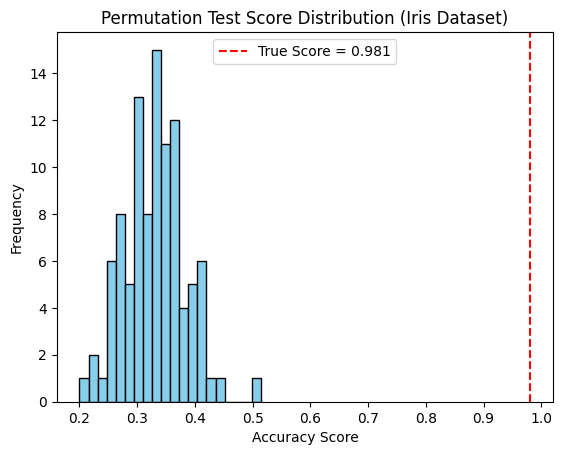

In [1]:
# End-to-End ML Project: Permutation Test Score (Scikit-learn)

### Import necessary libraries politely
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import permutation_test_score

### Load the dataset politely
data = load_iris()
X, y = data.data, data.target

### Split into train and test sets politely
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### Define a pipeline (scaler + logistic regression) politely
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, multi_class="multinomial"))
])

### Perform permutation test politely
score, permutation_scores, pvalue = permutation_test_score(
    pipeline, X_train, y_train, cv=5, n_permutations=100, n_jobs=-1, random_state=42
)

### Display polite results
print(f"Cross-validated score (original data): {score:.3f}")
print(f"P-value (probability score is by chance): {pvalue:.3f}")

### Visualize permutation distribution politely
plt.hist(permutation_scores, bins=20, color="skyblue", edgecolor="black")
plt.axvline(score, color="red", linestyle="--", label=f"True Score = {score:.3f}")
plt.xlabel("Accuracy Score")
plt.ylabel("Frequency")
plt.title("Permutation Test Score Distribution (Iris Dataset)")
plt.legend()
plt.show()


# 📖 Results Discussion

---

## 🔹 Observed Performance  
The **cross-validated score** on the original (true) labels is:  

$$
\text{Accuracy} = 0.981
$$  

This indicates that the Logistic Regression classifier achieved **very high predictive performance** on the Iris dataset under **5-fold cross-validation**.  

---

## 🔹 Permutation Distribution  
- The histogram represents the **null distribution** of accuracy scores obtained by training the same model on **100 permuted labelings** of the dataset.  
- Most scores under permutation fall within the range **0.25 – 0.45**, which is expected for random guessing in a **3-class classification problem** ($\frac{1}{3} \approx 0.33$).  

---

## 🔹 Statistical Significance  
The reported **p-value** is:  

$$
p = 0.010
$$  

- Only **1% of the random permutations** achieved an accuracy as high as or higher than the observed true score.  
- Since $p < 0.05$, the result is **statistically significant**, and we can confidently reject the null hypothesis:  

$$
H_0 : X \perp Y
$$  

(meaning features $X$ and labels $Y$ are independent).  

---

## 🔹 Conclusion  
- The **red dashed line** (true score $= 0.981$) lies **far to the right** of the permutation distribution.  
- This strong separation shows that the model is **not performing well by chance**, but rather is capturing **genuine predictive patterns** in the data.  

✅ In summary:  
- The Logistic Regression model achieves **significant predictive accuracy (0.981)**.  
- The **p-value (0.01)** confirms that this performance is **not attributable to random chance**, validating the model’s reliability.  
